# California Housing Dataset - EDA

In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset

df=pd.read_csv('housing.csv')
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [3]:
# Basic Info and Missing values
# Dataset overview
df.info()

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB

Missing values per column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
media

In [4]:
# Descriptive Statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
import os

# Define the directory name
IMAGES_PATH = "images"

# Create the folder if it does not exist
if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)
    print(f"Created directory: {IMAGES_PATH}/")

Created directory: images/


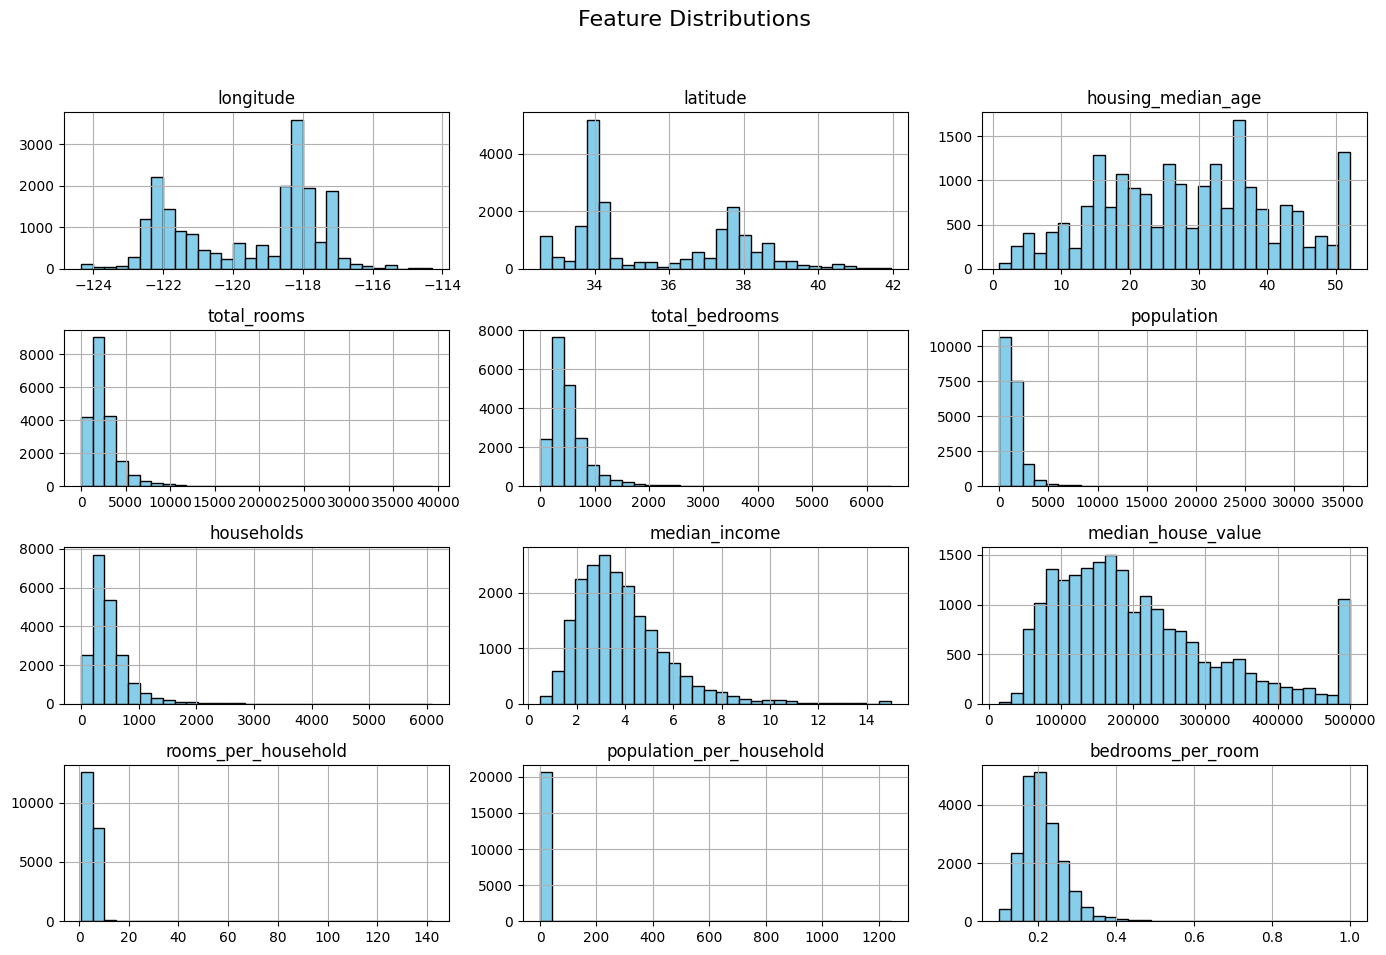

Plot saved successfully to: images\feature_distributions.png


In [17]:
# Distribution Plot Code
numeric_features = df.select_dtypes(include=[np.number]).columns

# Create the figure and subplots
df[numeric_features].hist(bins=30, figsize=(14, 10), color='skyblue', edgecolor='black')

# Add a title to the entire figure
plt.suptitle("Feature Distributions", fontsize=16)

# Tightly adjust the layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust to account for suptitle

# --- SAVE IMAGE HERE ---
file_name = "feature_distributions.png"
save_path = os.path.join(IMAGES_PATH, file_name)

# Save the plot
plt.savefig(save_path)
# --- END SAVE ---

# Display the plot
plt.show()

print(f"Plot saved successfully to: {save_path}")


Plot saved successfully to: images\correlation_heatmap_encoded.png


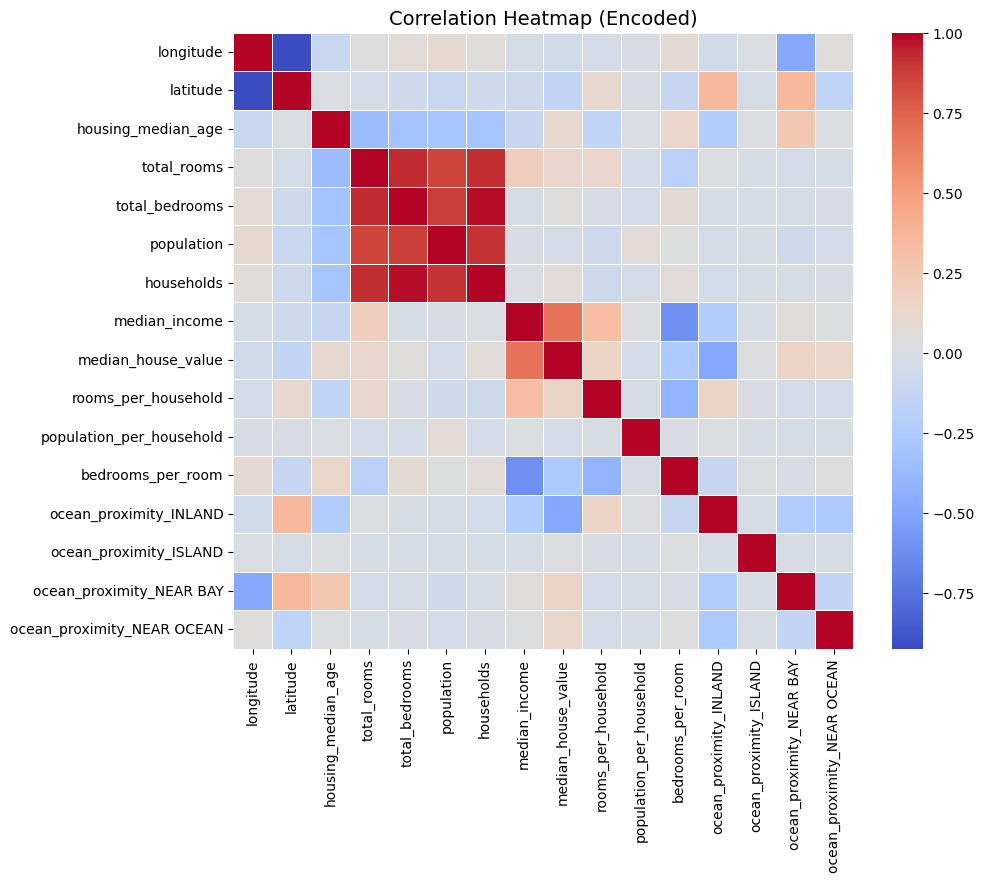


Top correlations with median_house_value
median_house_value            1.000000
median_income                 0.688075
ocean_proximity_NEAR BAY      0.160284
rooms_per_household           0.151948
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population_per_household     -0.023737
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
bedrooms_per_room            -0.255880
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


In [18]:
# # Correlation Matrix
# 1. One-Hot Encode the categorical column(s)
# Assuming 'ocean_proximity' is the problematic column.
# 'drop_first=True' avoids multicollinearity issues.
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Define the target variable (check for both common names)
target = 'MedHouseVal' if 'MedHouseVal' in df_encoded.columns else 'median_house_value'

# --- Correlation Heatmap ---
plt.figure(figsize=(10, 8))
# Calculate correlation on the fully numeric DataFrame
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap (Encoded)", fontsize=14)

# --- ADDED: Save the plot ---
file_name = "correlation_heatmap_encoded.png"
save_path = os.path.join(IMAGES_PATH, file_name)
plt.savefig(save_path)
print(f"Plot saved successfully to: {save_path}")
# ---------------------------

plt.show()

# --- Top correlations with target ---
if target in df_encoded.columns:
    # Calculate correlation with the encoded target
    corr = df_encoded.corr()[target].sort_values(ascending=False)
    print("\nTop correlations with", target)
    print(corr)

Plot saved successfully to: images\income_vs_housing_value_scatter.png


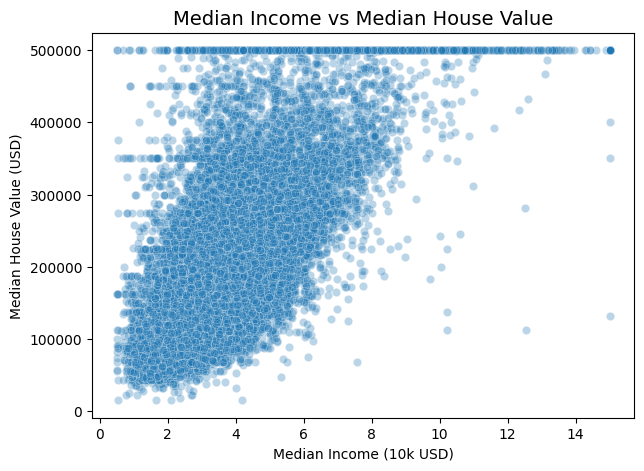

In [19]:
# # Income vs housing Value

# Define the columns (adjust these names based on your df.columns output!)
# Common alternative names for California Housing:
X_COL = 'MedInco'  # Try 'MedInc', 'MedInco', or 'median_income'
Y_COL = 'MedHouseVal' # Try 'MedHouseVal' or 'median_house_value'

# Check if the desired columns exist and adjust if necessary
if 'median_income' in df.columns:
    X_COL = 'median_income'
if 'median_house_value' in df.columns:
    Y_COL = 'median_house_value'

# --- Scatterplot Code (Using variables for clarity) ---
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x=X_COL, y=Y_COL, alpha=0.3)
plt.title("Median Income vs Median House Value", fontsize=14)
plt.xlabel("Median Income (10k USD)")
plt.ylabel("Median House Value (USD)")

# --- ADDED: Save the plot ---
file_name = "income_vs_housing_value_scatter.png"
save_path = os.path.join(IMAGES_PATH, file_name)

# Save the plot
plt.savefig(save_path)
print(f"Plot saved successfully to: {save_path}")
# ---------------------------

plt.show()

Plot saved successfully to: images\housing_price_map.png


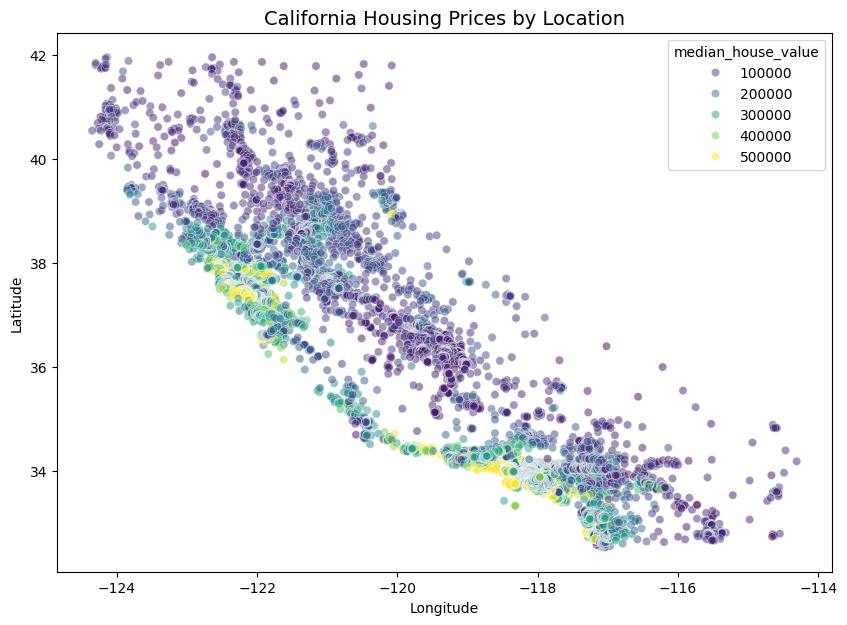

In [20]:
# # Geographic Visualization

# Define the correct columns (based on common dataset formats)
# Longitude and Latitude are usually lower-case
X_COL = 'longitude'
Y_COL = 'latitude'
HUE_COL = 'median_house_value' # Or 'MedHouseVal' if that's what your data uses

# Use the column names that are actually present in your DataFrame
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x=X_COL,
    y=Y_COL,
    hue=HUE_COL,
    palette='viridis',
    alpha=0.5
)
plt.title("California Housing Prices by Location", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude") 

# --- ADDED: Save the plot ---
file_name = "housing_price_map.png"
save_path = os.path.join(IMAGES_PATH, file_name)

# Save the plot
plt.savefig(save_path)
print(f"Plot saved successfully to: {save_path}")
# ---------------------------

plt.show()

New ratio features created successfully.
Plot saved successfully to: images\engineered_features_corr_heatmap.png


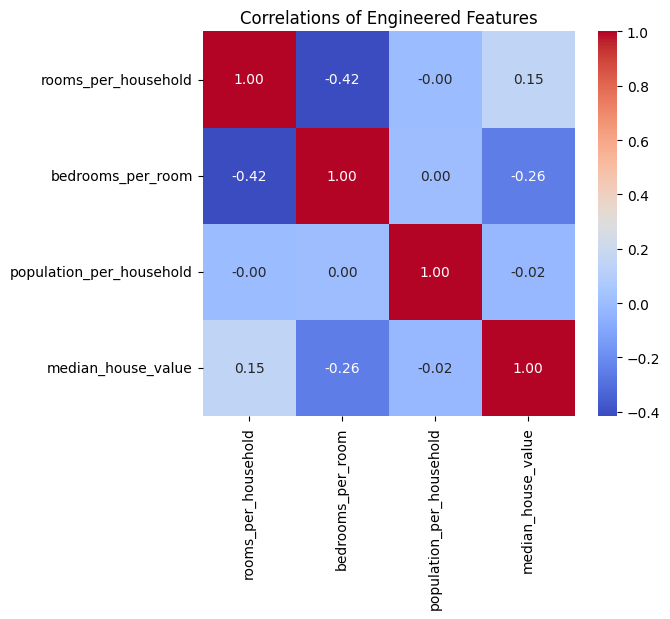

In [21]:
# # Feature Engineering

# Define the likely correct column names (based on standard datasets)
ROOMS_COL = 'total_rooms'
BEDROOMS_COL = 'total_bedrooms'
POP_COL = 'population'
HH_COL = 'households'
TARGET_COL = 'MedHouseVal' # Use 'median_house_value' if 'MedHouseVal' fails

# We'll use a robust method to create the features, assuming the standard names exist.
# You must first ensure these columns are in your DataFrame!
try:
    # 1. Rooms per Household (Average Rooms)
    df['rooms_per_household'] = df[ROOMS_COL] / df[HH_COL]
    
    # 2. Population per Household (Average Occupancy)
    df['population_per_household'] = df[POP_COL] / df[HH_COL]
    
    # 3. Bedrooms per Room 
    df['bedrooms_per_room'] = df[BEDROOMS_COL] / df[ROOMS_COL]
    
    print("New ratio features created successfully.")

except KeyError as e:
    # Print the column name that caused the issue for debugging
    missing_col = str(e).strip("'")
    print(f"\n❌ KeyError: The column '{missing_col}' was not found in your DataFrame.")
    print("Please run print(df.columns) to verify the correct case-sensitive names and update the code.")
    # Stop execution of the rest of the block if features aren't created
    exit() 

# --- 2. View Correlations of New Features ---
# Ensure the target column name is correct for the heatmap
if TARGET_COL not in df.columns and 'median_house_value' in df.columns:
    TARGET_COL = 'median_house_value'

# Check if all columns needed for the correlation matrix exist before plotting
plot_cols = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household', TARGET_COL]

if all(col in df.columns for col in plot_cols):
    corr_new = df[plot_cols].corr()
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr_new, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlations of Engineered Features", fontsize=12)
    
    # --- ADDED: Save the plot ---
    file_name = "engineered_features_corr_heatmap.png"
    save_path = os.path.join(IMAGES_PATH, file_name)
    plt.savefig(save_path)
    print(f"Plot saved successfully to: {save_path}")
    # ---------------------------

    plt.show()
else:
    print(f"\nCould not plot heatmap: Missing one or more columns from {plot_cols}.")

In [15]:
print("=== SUMMARY INSIGHTS ===")
print("- Median income is the strongest predictor of house value.")
print("- Coastal and bay-area regions have higher prices.")
print("- Large variance in population and rooms suggests right-skewed data.")
print("- Consider log-transforming 'MedianHouseValue' for modeling.")


=== SUMMARY INSIGHTS ===
- Median income is the strongest predictor of house value.
- Coastal and bay-area regions have higher prices.
- Large variance in population and rooms suggests right-skewed data.
- Consider log-transforming 'MedianHouseValue' for modeling.
